In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip install -q wandb

In [4]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
import wandb
import glob

In [5]:
!git clone https://github.com/emanhamed/Houses-dataset

fatal: destination path 'Houses-dataset' already exists and is not an empty directory.


In [6]:
inputpath = "/content/Houses-dataset/Houses Dataset"

## there is a Housesinfo.txt file(csv without comma) in 'Houses Dataset' folder that should be remove

In [7]:
new_inputpath = "/content/drive/MyDrive/Houses Dataset"
images_list = []
for image in os.listdir(new_inputpath):
  img = cv2.imread("/content/drive/MyDrive/Houses Dataset/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  images_list.append(img)

In [8]:
df_images = pd.Series(images_list, name="Images")
df_images

0       [[[83, 113, 177], [83, 113, 177], [83, 113, 17...
1       [[[251, 251, 253], [247, 247, 249], [255, 255,...
2       [[[186, 185, 183], [154, 153, 151], [168, 167,...
3       [[[108, 90, 70], [77, 59, 39], [84, 67, 49], [...
4       [[[240, 240, 242], [240, 240, 242], [241, 241,...
                              ...                        
2135    [[[220, 165, 100], [212, 157, 92], [210, 155, ...
2136    [[[44, 40, 37], [62, 58, 55], [77, 73, 70], [1...
2137    [[[0, 94, 210], [0, 94, 210], [0, 94, 210], [0...
2138    [[[232, 232, 232], [255, 255, 255], [254, 254,...
2139    [[[94, 103, 76], [55, 68, 42], [50, 65, 44], [...
Name: Images, Length: 2140, dtype: object

# convert txt file to csv :



convert space-delimiter in text file , into comma in csv file:

In [9]:
with open('/content/HousesInfo.txt') as infile:
    data = infile.read().replace(' ', ',')
    print(data, file=open('house_price_info.csv', 'w'))

In [10]:
df_info = pd.read_csv('/content/house_price_info.csv')
df_info

,Bedrooms,bathrooms,Area,Zipcode,Price
0,4,4.0,4053,85255,869500
1,4,3.0,3343,36372,865200
2,3,4.0,3923,85266,889000
3,5,5.0,4022,85262,910000
4,3,4.0,4116,85266,971226
...,...,...,...,...,...
530,5,2.0,2066,94531,399900
531,4,3.5,9536,94531,460000
532,3,2.0,2014,94531,407000
533,4,3.0,2312,94531,419000


# نکته
# در کل ۲۱۴۰ تا تصویر داریم اما تعداد سطر های فایل سی اس وی ۵۳۵ تاست

# به دلیل اینکه هرچهارتا تصویر مربوط به یک خانه اند و در کل تعداد سطر های دیتافریم به این صورت باید باشد :
# **2140 / 4  = 535**

In [11]:
df_images.shape

(2140,)

In [12]:
df_info.shape

(535, 5)

## Montage / tile the each 4 images for each house

# راه حل :

# پس اول باید هر ۴ عکس مربوط به هرخانه را به هم متصل کنیم تا تعداد تصاویر در نهایت ۵۳۵ تا بشود :

In [13]:
df_info.shape[0]

535

# make farme of 4 images :

In [14]:

images = []

for i in range(df_info.shape[0]) :
  basePath = os.path.sep.join([new_inputpath, "{}_*".format(i + 1)])
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((400, 400, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (200, 200))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:200, 0:200] = inputImages[0]
  outputImage[0:200, 200:400] = inputImages[1]
  outputImage[200:400, 200:400] = inputImages[2]
  outputImage[200:400, 0:200] = inputImages[3]
  images.append(outputImage)

images = np.array(images)

['/content/drive/MyDrive/Houses Dataset/1_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/1_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/1_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/2_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/2_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/2_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/3_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/3_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/3_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/4_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_bedroom.jpg', '/content/drive/MyDrive/Houses Dataset/4_frontal.jpg', '/content/drive/MyDrive/Houses Dataset/4_kitchen.jpg']
['/content/drive/MyDrive/Houses Dataset/5_bathroom.jpg', '/content/drive/MyDrive/Houses Dataset/5_bedroom.jpg', 

In [15]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])

/content/drive/MyDrive/Houses Dataset/535_bathroom.jpg
/content/drive/MyDrive/Houses Dataset/535_bedroom.jpg
/content/drive/MyDrive/Houses Dataset/535_frontal.jpg
/content/drive/MyDrive/Houses Dataset/535_kitchen.jpg


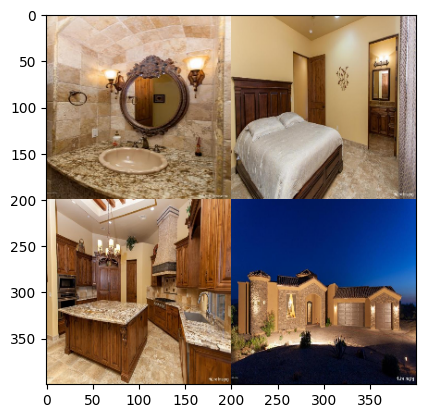

In [16]:
plt.imshow(images[1])

In [17]:
images[1].shape

(400, 400, 3)

In [18]:
images.shape

(535, 400, 400, 3)

In [19]:
images_list = []
for i in range(535):
  images_list.append(images[i])

images = pd.Series(images_list, name="Images")

# now we concat images list to dataframe :

In [20]:
df = pd.concat([images , df_info], axis=1)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[173, 142, 114], [184, 165, 133], [178, 157,...",4,4.0,4053,85255,869500
1,"[[[228, 204, 176], [227, 203, 177], [226, 203,...",4,3.0,3343,36372,865200
2,"[[[125, 76, 35], [81, 34, 15], [92, 47, 26], [...",3,4.0,3923,85266,889000
3,"[[[246, 203, 161], [246, 203, 161], [245, 200,...",5,5.0,4022,85262,910000
4,"[[[224, 244, 253], [166, 183, 183], [118, 110,...",3,4.0,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[245, 245, 241], [250, 251, 246], [245, 246,...",5,2.0,2066,94531,399900
531,"[[[245, 244, 241], [251, 250, 245], [247, 247,...",4,3.5,9536,94531,460000
532,"[[[29, 27, 28], [31, 29, 30], [29, 27, 28], [3...",3,2.0,2014,94531,407000
533,"[[[250, 250, 250], [251, 251, 251], [247, 247,...",4,3.0,2312,94531,419000


In [21]:
df["bathrooms"] = df["bathrooms"].astype(int)
df

,Images,Bedrooms,bathrooms,Area,Zipcode,Price
0,"[[[173, 142, 114], [184, 165, 133], [178, 157,...",4,4,4053,85255,869500
1,"[[[228, 204, 176], [227, 203, 177], [226, 203,...",4,3,3343,36372,865200
2,"[[[125, 76, 35], [81, 34, 15], [92, 47, 26], [...",3,4,3923,85266,889000
3,"[[[246, 203, 161], [246, 203, 161], [245, 200,...",5,5,4022,85262,910000
4,"[[[224, 244, 253], [166, 183, 183], [118, 110,...",3,4,4116,85266,971226
...,...,...,...,...,...,...
530,"[[[245, 245, 241], [250, 251, 246], [245, 246,...",5,2,2066,94531,399900
531,"[[[245, 244, 241], [251, 250, 245], [247, 247,...",4,3,9536,94531,460000
532,"[[[29, 27, 28], [31, 29, 30], [29, 27, 28], [3...",3,2,2014,94531,407000
533,"[[[250, 250, 250], [251, 251, 251], [247, 247,...",4,3,2312,94531,419000


# Create model & train :

In [22]:
X = np.array(df["Images"].values.tolist())
Y = np.array(df["Price"].values.tolist())

print(X.shape)
print(Y.shape)


(535, 400, 400, 3)
(535,)


In [23]:
from sklearn.model_selection import train_test_split

X_train , X_val , Y_train , Y_val = train_test_split(X , Y , test_size=0.1)
print(X_train.shape)
print(X_val.shape)
print(Y_train.shape)
print(Y_val.shape)

(481, 400, 400, 3)
(54, 400, 400, 3)
(481,)
(54,)


In [24]:
image_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

train_data = image_data_generator.flow(
    X_train,
    Y_train,
    shuffle=True
)

validation_data = image_data_generator.flow(
    X_val,
    Y_val,
    batch_size=16,
    shuffle=False
)

In [25]:
# del X
# del Y
# del df
# del images
# del image

# wandb

In [27]:
run = wandb.init(project="House_price_prediction")

from wandb.sdk.wandb_run import wandb_metric
config = wandb.config
from wandb.keras import (
   WandbMetricsLogger,
   WandbModelCheckpoint,
)

wandb_callbacks = [
   WandbMetricsLogger(log_freq=5),
   WandbModelCheckpoint("models"),
]


wandb: Currently logged in as: kianajahanshid. Use `wandb login --relogin` to force relogin


In [ ]:
initial_model = tf.keras.applications.EfficientNetB2(
    weights="imagenet",
    include_top=False,
    input_shape=(400,400,3),
    pooling="avg"
)

In [ ]:
for layer in initial_model.layers:
  layer.trainable = False

In [ ]:

model = tf.keras.Sequential([
    initial_model,
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation="linear")
])


model.compile(loss=tf.keras.losses.mean_absolute_percentage_error , optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001)) # chon regression hast niyazi be accuracy nadarim


In [30]:
history = model.fit(train_data , validation_data=validation_data , epochs=20 , callbacks=wandb_callbacks)

Epoch 1/20
16/16 [==============================] - ETA: 0s - loss: 99.9882

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 58s 2s/step - loss: 99.9882 - val_loss: 99.9632
Epoch 2/20
16/16 [==============================] - ETA: 0s - loss: 99.8940

wandb: Adding directory to artifact (./models)... Done. 3.1s


16/16 [==============================] - 34s 2s/step - loss: 99.8940 - val_loss: 99.7665
Epoch 3/20
16/16 [==============================] - ETA: 0s - loss: 99.5158

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 32s 2s/step - loss: 99.5158 - val_loss: 99.0054
Epoch 4/20
16/16 [==============================] - ETA: 0s - loss: 98.0174

wandb: Adding directory to artifact (./models)... Done. 4.1s


16/16 [==============================] - 29s 2s/step - loss: 98.0174 - val_loss: 96.5756
Epoch 5/20
16/16 [==============================] - ETA: 0s - loss: 93.6832

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 28s 2s/step - loss: 93.6832 - val_loss: 89.9191
Epoch 6/20
16/16 [==============================] - ETA: 0s - loss: 84.3831

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 26s 2s/step - loss: 84.3831 - val_loss: 75.6465
Epoch 7/20
16/16 [==============================] - ETA: 0s - loss: 73.5357

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 29s 2s/step - loss: 73.5357 - val_loss: 68.9843
Epoch 8/20
16/16 [==============================] - ETA: 0s - loss: 70.2791

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 25s 2s/step - loss: 70.2791 - val_loss: 69.7634
Epoch 9/20
16/16 [==============================] - ETA: 0s - loss: 71.4986

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 30s 2s/step - loss: 71.4986 - val_loss: 70.0938
Epoch 10/20
16/16 [==============================] - ETA: 0s - loss: 71.0569

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 26s 2s/step - loss: 71.0569 - val_loss: 69.3376
Epoch 11/20
16/16 [==============================] - ETA: 0s - loss: 71.8372

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 30s 2s/step - loss: 71.8372 - val_loss: 68.8974
Epoch 12/20
16/16 [==============================] - ETA: 0s - loss: 68.8995

wandb: Adding directory to artifact (./models)... Done. 5.1s


16/16 [==============================] - 31s 2s/step - loss: 68.8995 - val_loss: 69.3297
Epoch 13/20
16/16 [==============================] - ETA: 0s - loss: 69.5453

wandb: Adding directory to artifact (./models)... Done. 9.3s


16/16 [==============================] - 37s 2s/step - loss: 69.5453 - val_loss: 69.3855
Epoch 14/20
16/16 [==============================] - ETA: 0s - loss: 69.7148

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 31s 2s/step - loss: 69.7148 - val_loss: 69.3517
Epoch 15/20
16/16 [==============================] - ETA: 0s - loss: 70.2113

wandb: Adding directory to artifact (./models)... Done. 5.2s


16/16 [==============================] - 30s 2s/step - loss: 70.2113 - val_loss: 69.5275
Epoch 16/20
16/16 [==============================] - ETA: 0s - loss: 68.6577

wandb: Adding directory to artifact (./models)... Done. 4.8s


16/16 [==============================] - 30s 2s/step - loss: 68.6577 - val_loss: 69.5285
Epoch 17/20
16/16 [==============================] - ETA: 0s - loss: 68.9885

wandb: Adding directory to artifact (./models)... Done. 5.2s


16/16 [==============================] - 33s 2s/step - loss: 68.9885 - val_loss: 69.6432
Epoch 18/20
16/16 [==============================] - ETA: 0s - loss: 70.3995

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 26s 2s/step - loss: 70.3995 - val_loss: 69.2313
Epoch 19/20
16/16 [==============================] - ETA: 0s - loss: 69.6541

wandb: Adding directory to artifact (./models)... Done. 1.2s


16/16 [==============================] - 33s 2s/step - loss: 69.6541 - val_loss: 68.8242
Epoch 20/20
16/16 [==============================] - ETA: 0s - loss: 69.6010

wandb: Adding directory to artifact (./models)... Done. 5.0s


16/16 [==============================] - 32s 2s/step - loss: 69.6010 - val_loss: 69.3484


In [31]:
model.save("/content/drive/MyDrive/House_price.keras")

# Inference

In [ ]:
model= tf.keras.models.load_model("/content/drive/MyDrive/House_price.keras")

In [32]:
test_images_list = []
test_images_dir = "/content/tesst"
for image in os.listdir(test_images_dir):
  img = cv2.imread("/content/tesst/" + image)
  img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)
  test_images_list.append(img)


In [33]:
df_images = pd.Series(test_images_list, name="Images")
df_images

0    [[[132, 178, 228], [133, 179, 229], [133, 179,...
1    [[[24, 19, 15], [18, 13, 9], [12, 7, 3], [9, 4...
2    [[[37, 29, 18], [37, 29, 18], [39, 31, 20], [4...
3    [[[125, 124, 120], [125, 124, 120], [125, 124,...
4    [[[239, 241, 240], [239, 241, 240], [239, 241,...
5    [[[196, 226, 255], [193, 223, 255], [190, 219,...
6    [[[124, 152, 130], [88, 116, 93], [80, 106, 81...
7    [[[139, 150, 146], [156, 167, 163], [161, 172,...
Name: Images, dtype: object

In [34]:
images=[]
for i in range(2) :
  basePath = os.path.sep.join([test_images_dir, "{}_*".format(i + 1)])
  print(basePath)
  housePaths = sorted(list(glob.glob(basePath)))
  print(housePaths)
  inputImages = []
  outputImage = np.zeros((400, 400, 3), dtype="uint8")

  for housePath in housePaths:
    image = cv2.imread(housePath)
    image = cv2.resize(image, (200, 200))
    image = cv2.cvtColor(image , cv2.COLOR_BGR2RGB)
    inputImages.append(image)

  outputImage[0:200, 0:200] = inputImages[0]
  outputImage[0:200, 200:400] = inputImages[1]
  outputImage[200:400, 200:400] = inputImages[2]
  outputImage[200:400, 0:200] = inputImages[3]
  images.append(outputImage)

images = np.array(images)

/content/tesst/1_*
['/content/tesst/1_bathroom.jpg', '/content/tesst/1_bedroom.jpg', '/content/tesst/1_frontal.jpg', '/content/tesst/1_kitchen.jpg']
/content/tesst/2_*
['/content/tesst/2_bathroom.jpg', '/content/tesst/2_bedroom.jpg', '/content/tesst/2_frontal.jpg', '/content/tesst/2_kitchen.jpg']


In [35]:
print(housePaths[0])
print(housePaths[1])
print(housePaths[2])
print(housePaths[3])


/content/tesst/2_bathroom.jpg
/content/tesst/2_bedroom.jpg
/content/tesst/2_frontal.jpg
/content/tesst/2_kitchen.jpg


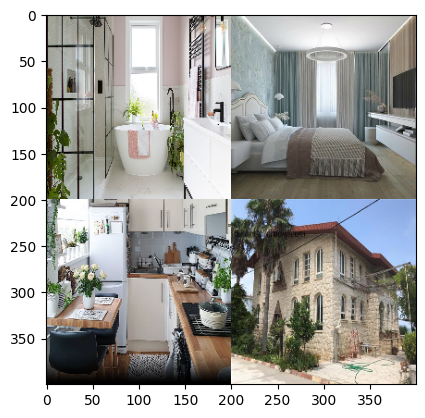

In [36]:
plt.imshow(images[0])

1/1 [==============================] - 0s 176ms/step
predicted Price of random house:  181130.2


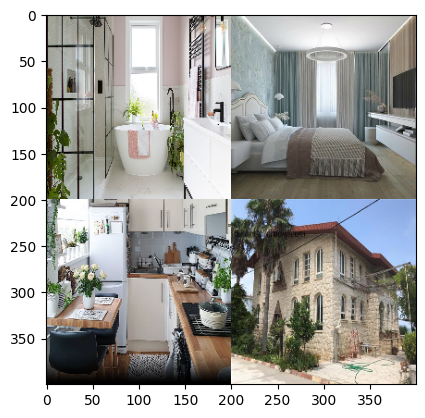

In [37]:
new_image = cv2.resize(images[0] , (400,400))
plt.imshow(new_image)
new_image = new_image / 255.0
new_image = np.reshape(new_image, [1, 400, 400, 3]) # new_iamge.reshape(1,299,299,3)

output = model.predict(new_image)
print('predicted Price of random house: ' , output[0][0])

# My House :

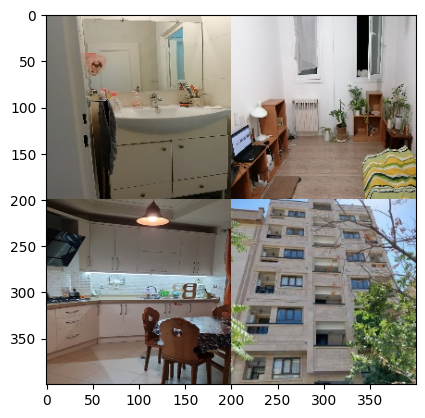

In [38]:
plt.imshow(images[1])

1/1 [==============================] - 0s 30ms/step
MY House Price Prediction:  153630.52


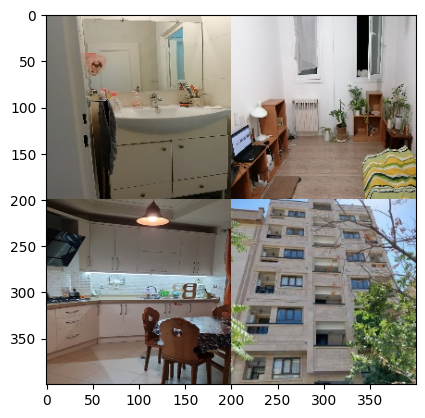

In [39]:
new_image = cv2.resize(images[1] , (400,400))
plt.imshow(new_image)
new_image = new_image / 255.0
new_image = np.reshape(new_image, [1, 400, 400, 3]) # new_iamge.reshape(1,299,299,3)

output = model.predict(new_image)
print('MY House Price Prediction: ' , output[0][0])